<a href="https://colab.research.google.com/github/xxnyang/class_repo/blob/chap7/functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# 간단 모델

In [2]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

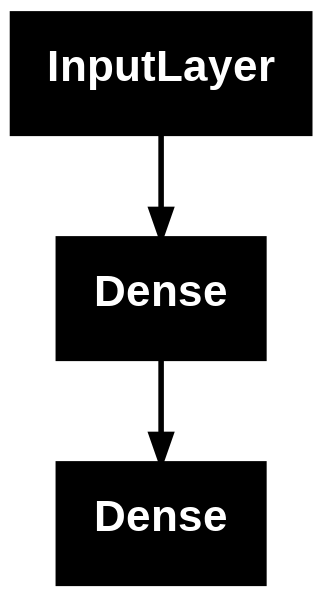

In [4]:
keras.utils.plot_model(model, "simple_model.png")

# multi input, output

이 모델이 하는 일:

priority(회귀-sigmoid)와 dempartment(분류-softmax) 예측

build

In [5]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

training

In [6]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - department_accuracy: 0.1352 - department_loss: 41.4091 - loss: 41.6913 - priority_loss: 0.2822 - priority_mean_absolute_error: 0.4452
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.0791 - department_loss: 29.7408 - loss: 30.0687 - priority_loss: 0.3280 - priority_mean_absolute_error: 0.4949
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [7]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - department_accuracy: 0.2095 - department_loss: 45.5082 - loss: 45.8379 - priority_loss: 0.3297 - priority_mean_absolute_error: 0.4986
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - department_accuracy: 0.1218 - department_loss: 45.6140 - loss: 45.9420 - priority_loss: 0.3280 - priority_mean_absolute_error: 0.4949
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


visualize

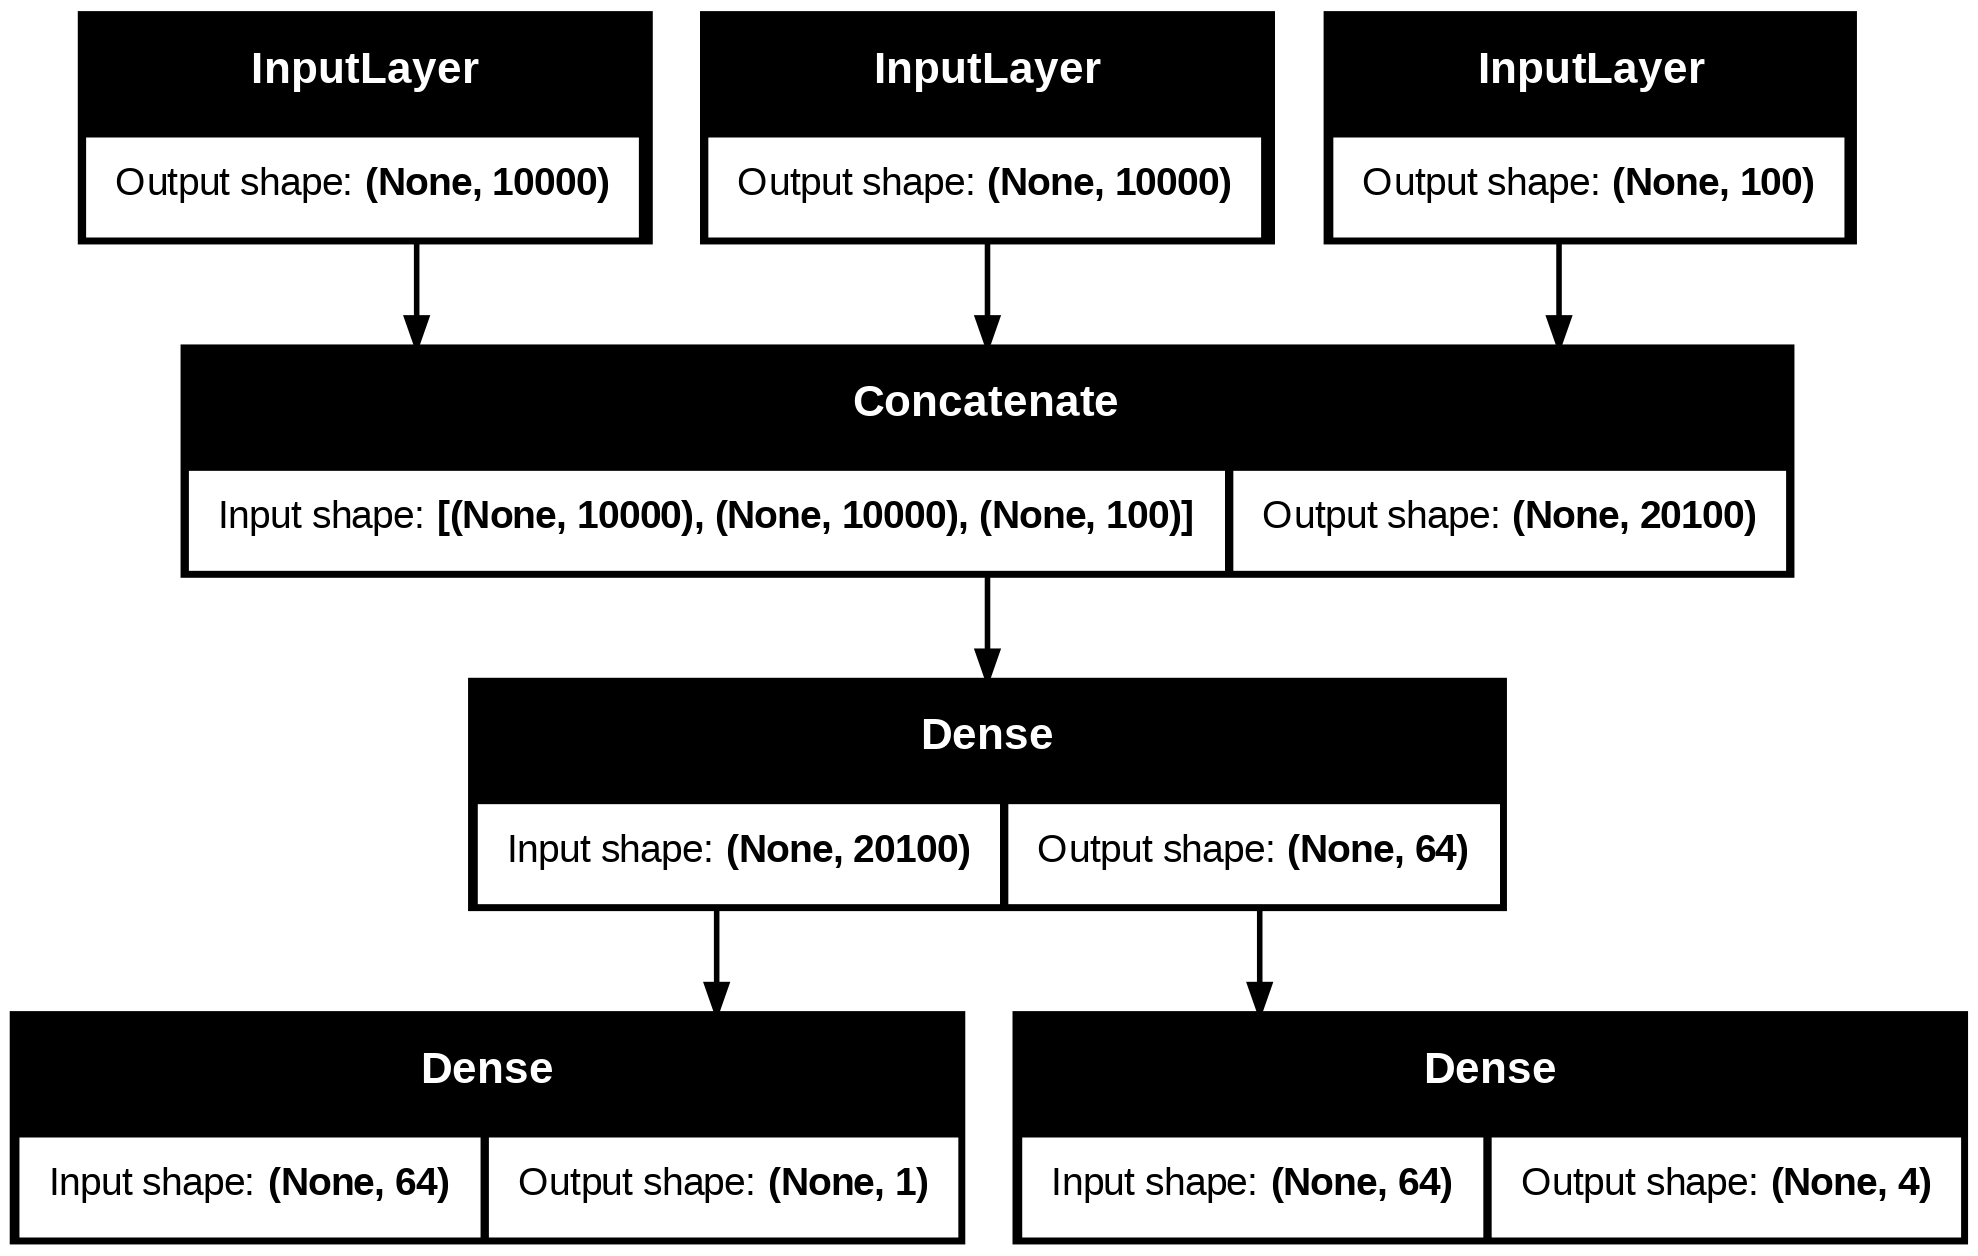

In [8]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

# New model 1

build

In [13]:
vocabulary_size = 10000       # BoW 벡터의 차원
num_tags = 100                # 태그의 원-핫 벡터 차원
num_departments = 4           # 분류해야 할 부서의 개수 (클래스 개수)

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)
features = layers.Dense(36, activation="relu")(features)
features = layers.Dense(24, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

training

In [14]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - department_accuracy: 0.2346 - department_loss: 74.7130 - loss: 75.0000 - priority_loss: 0.2870 - priority_mean_absolute_error: 0.4512
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.2403 - department_loss: 238.1357 - loss: 238.4589 - priority_loss: 0.3233 - priority_mean_absolute_error: 0.4906
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [15]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - department_accuracy: 0.2999 - department_loss: 258.8479 - loss: 259.1837 - priority_loss: 0.3358 - priority_mean_absolute_error: 0.4996
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.2403 - department_loss: 188.8201 - loss: 189.1433 - priority_loss: 0.3233 - priority_mean_absolute_error: 0.4906
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


visualize

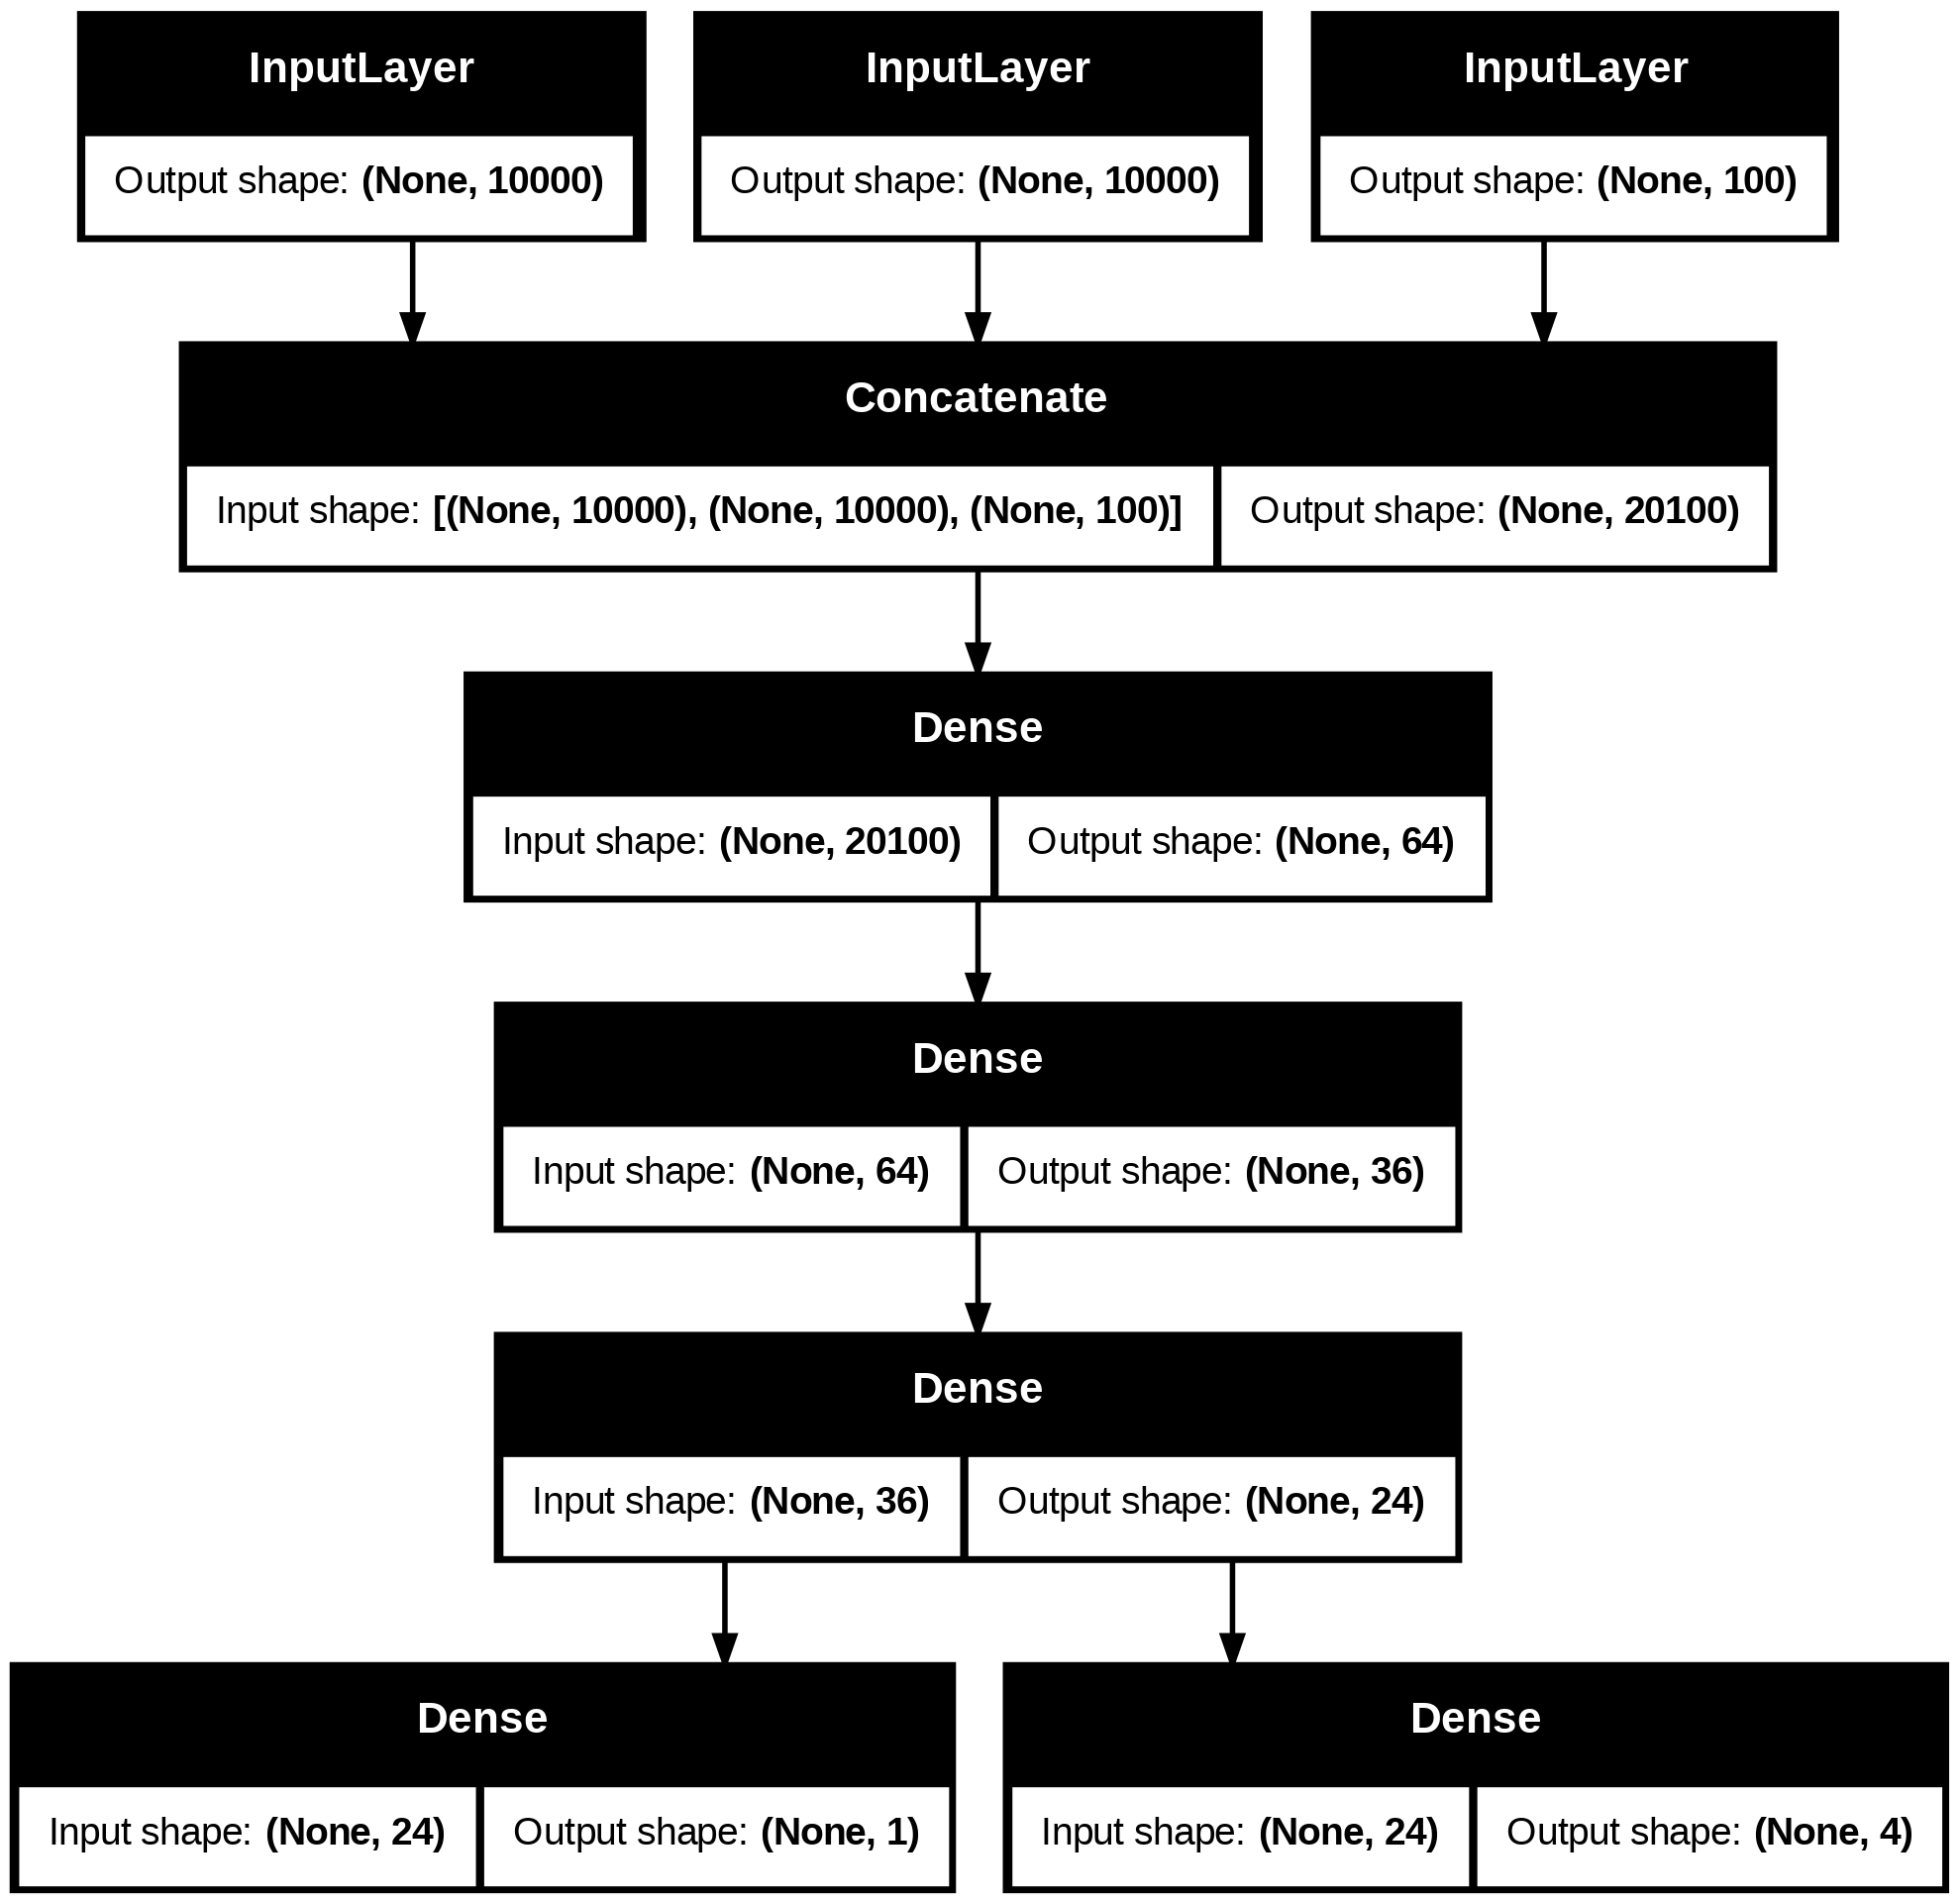

In [16]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

# new model 2

build

In [62]:
vocabulary_size = 10000       # BoW 벡터의 차원
num_tags = 100                # 태그의 원-핫 벡터 차원
num_departments = 4           # 분류해야 할 부서의 개수 (클래스 개수)

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)
features = layers.Dense(36, activation="relu")(features)

branch1 = layers.Dense(24, activation="sigmoid")(features)

#branch2 = layers.Dense(24, activation="sigmoid")(features)
difficulty = layers.Dense(3, activation="sigmoid", name="difficulty")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(branch1)
department = layers.Dense(num_departments, activation="softmax", name="department")(branch1)

model2 = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

training

In [63]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
difficulty_data = np.random.random(size=(num_samples, 1))

model2.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy", "mean_squared_error" ],
              metrics=[["mean_absolute_error"], ["accuracy"], ["mean_absolute_error"]])
model2.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data, difficulty_data],
          epochs=1)
model2.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data, difficulty_data])
priority_preds, department_preds, difficulty_data = model2.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - department_accuracy: 0.1375 - department_loss: 2.8811 - difficulty_loss: 0.2860 - difficulty_mean_absolute_error: 0.4561 - loss: 3.2513 - priority_loss: 0.0841 - priority_mean_absolute_error: 0.2535
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.1217 - department_loss: 2.7992 - difficulty_loss: 0.3264 - difficulty_mean_absolute_error: 0.4966 - loss: 3.2090 - priority_loss: 0.0834 - priority_mean_absolute_error: 0.2490
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [64]:
model2.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy", "difficulty": "mean_absolute_error"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"], "difficulty": ["mean_absolute_error"]})
model2.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data, "difficulty": difficulty_data},
          epochs=1)
model2.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data, "difficulty": difficulty_data})
priority_preds, department_preds, difficulty_preds = model2.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - department_accuracy: 0.1252 - department_loss: 2.7829 - difficulty_loss: 1.9235e-08 - difficulty_mean_absolute_error: 1.9235e-08 - loss: 2.8660 - priority_loss: 0.0831 - priority_mean_absolute_error: 0.2500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.1217 - department_loss: 2.7884 - difficulty_loss: 1.4520e-09 - difficulty_mean_absolute_error: 1.4520e-09 - loss: 2.8718 - priority_loss: 0.0834 - priority_mean_absolute_error: 0.2490
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


visualize

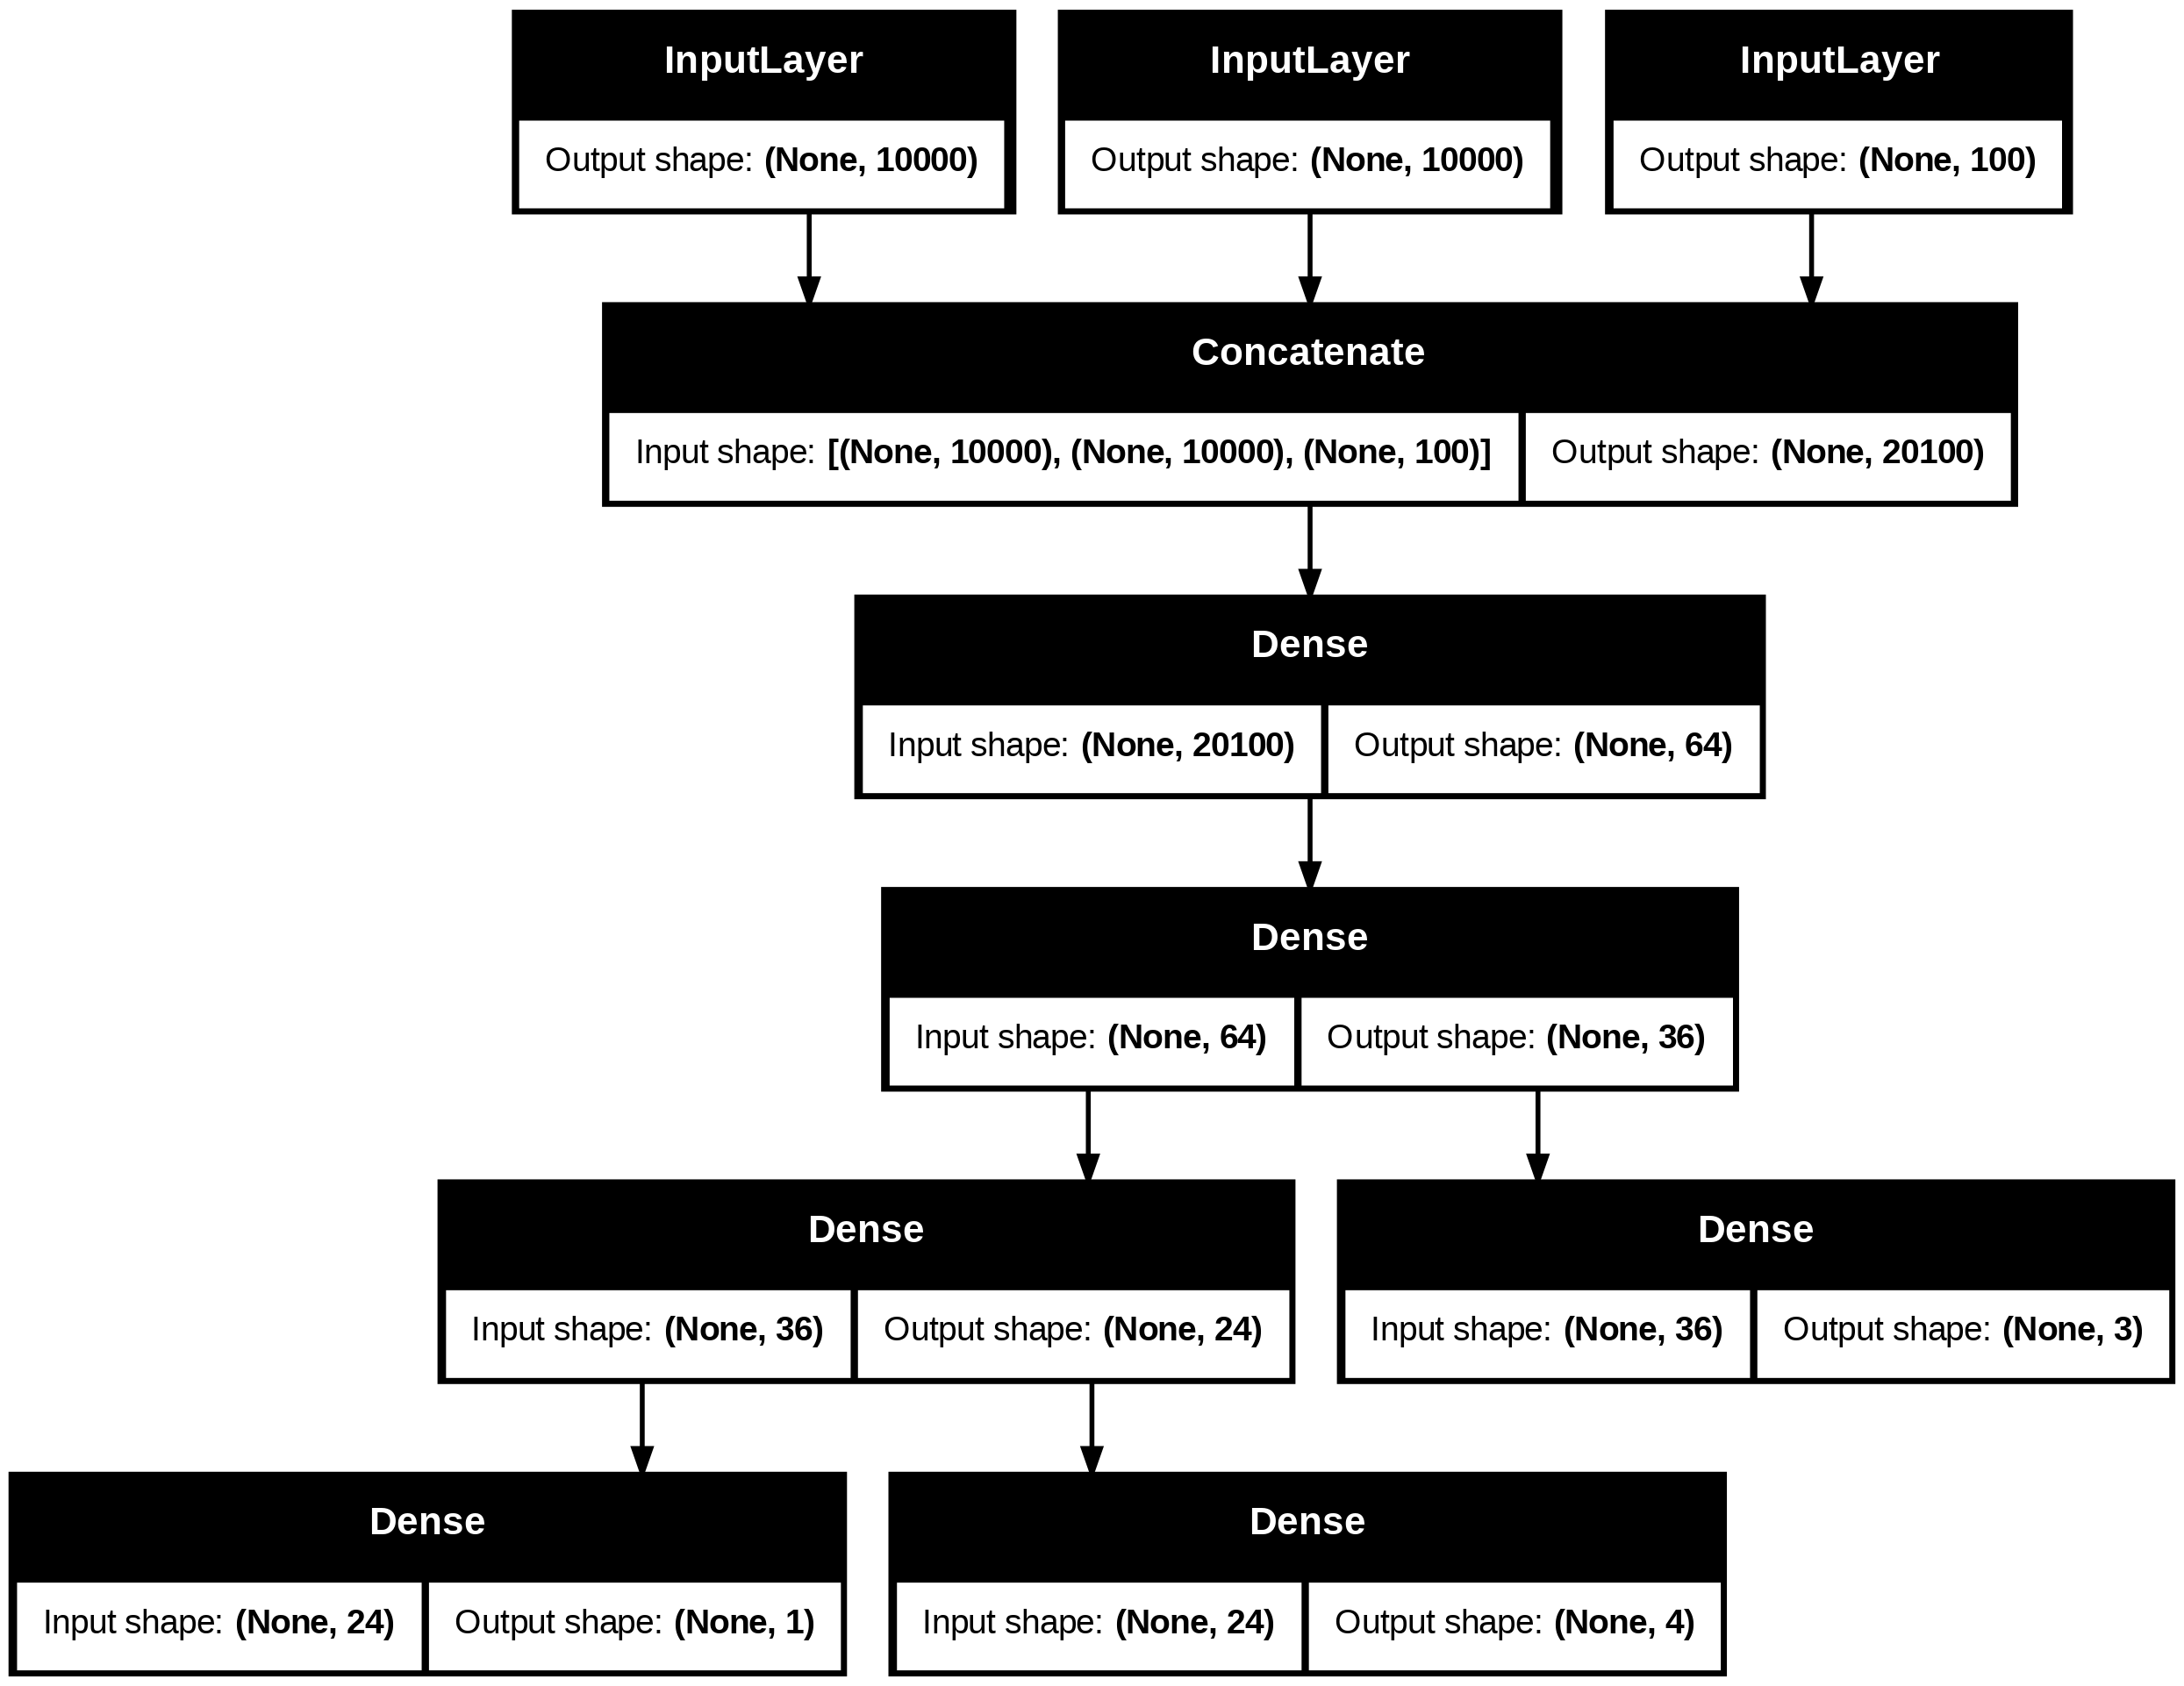

In [65]:
keras.utils.plot_model(model2, "updated_ticket_classifier.png", show_shapes=True)